In [96]:
#importar bibliotecas
#!pip install -U scikit-learn
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
%matplotlib inline

In [97]:
df = pd.read_csv("dados/df2018_2022.csv", sep=",")
df[(df['temporada']<=2021)]

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,formacao_mandante,formacao_visitante,resultado,temporada,mv,gols
0,6126,1,Cruzeiro,12,2,40%,425,81%,20,3,0,0,7,4-2-3-1,4-2-3-1,D,2018,m,0
1,6126,1,Gremio,6,2,60%,649,86%,15,1,1,3,4,4-2-3-1,4-2-3-1,V,2018,v,1
2,6127,1,Vitoria,21,6,66%,545,88%,24,3,0,2,4,4-2-3-1,4-1-4-1,E,2018,m,2
3,6127,1,Flamengo,10,5,34%,286,72%,10,2,1,2,5,4-2-3-1,4-1-4-1,E,2018,v,2
4,6128,1,Santos,22,3,54%,532,90%,7,0,0,1,4,4-3-3,4-1-4-1,V,2018,m,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,7643,38,Corinthians,1,1,56%,519,85%,22,2,1,0,4,3-4-3,4-3-3,D,2021,v,0
3036,7644,38,Gremio,7,4,37%,328,83%,15,3,0,1,3,4-2-3-1,4-2-3-1,V,2021,m,4
3037,7644,38,Atletico-MG,13,7,63%,548,88%,11,1,0,0,9,4-2-3-1,4-2-3-1,D,2021,v,3
3038,7645,38,Santos,13,5,62%,513,84%,17,1,0,0,6,3-4-2-1,4-4-2,E,2021,m,1


In [98]:
#modificando o resultado para numerico
df.loc[(df['resultado']=="V"),'resultado'] = 1
df.loc[(df['resultado']=="D"),'resultado'] = 2
df.loc[(df['resultado']=="E"),'resultado'] = 3

df.loc[(df['mv']=="m"),'mandante'] = 1
df.loc[(df['mv']=="v"),'mandante'] = 0
df.loc[(df['mv']=="v"),'visitante'] = 1
df.loc[(df['mv']=="m"),'visitante'] = 0

df['mandante'] = df['mandante'].astype(int)
df['visitante'] = df['visitante'].astype(int)
df['resultado'] = df['resultado'].astype(int)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   partida_id          3800 non-null   int64 
 1   rodada_x            3800 non-null   int64 
 2   clube               3800 non-null   object
 3   chutes              3800 non-null   int64 
 4   chutes_no_alvo      3800 non-null   int64 
 5   posse_de_bola       3800 non-null   object
 6   passes              3800 non-null   int64 
 7   precisao_passes     3800 non-null   object
 8   faltas              3800 non-null   int64 
 9   cartao_amarelo      3800 non-null   int64 
 10  cartao_vermelho     3800 non-null   int64 
 11  impedimentos        3800 non-null   int64 
 12  escanteios          3800 non-null   int64 
 13  formacao_mandante   3800 non-null   object
 14  formacao_visitante  3800 non-null   object
 15  resultado           3800 non-null   int32 
 16  temporada           3800

In [100]:
df.tail()

,partida_id,rodada_x,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,...,impedimentos,escanteios,formacao_mandante,formacao_visitante,resultado,temporada,mv,gols,mandante,visitante
3795,8023,38,Atletico-MG,17,7,41%,351,82%,19,6,...,0,4,4-1-4-1,4-2-3-1,1,2022,v,1,0,1
3796,8024,38,Internacional,15,8,48%,287,77%,13,2,...,1,6,4-2-3-1,4-2-3-1,1,2022,m,3,1,0
3797,8024,38,Palmeiras,11,2,52%,306,82%,17,3,...,2,5,4-2-3-1,4-2-3-1,2,2022,v,0,0,1
3798,8025,38,Goias,6,2,35%,330,80%,12,2,...,1,3,4-2-3-1,4-1-2-1-2,2,2022,m,0,1,0
3799,8025,38,Sao Paulo,13,7,65%,591,90%,14,1,...,0,4,4-2-3-1,4-1-2-1-2,1,2022,v,4,0,1


In [101]:
# listando features categoricas e numéricas:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['clube', 'posse_de_bola', 'precisao_passes', 'formacao_mandante', 'formacao_visitante', 'mv']
numerical_attributes: ['partida_id', 'rodada_x', 'chutes', 'chutes_no_alvo', 'passes', 'faltas', 'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios', 'temporada', 'gols']


In [102]:
#Deixar somente as variáveis numericas 
num_data  =df.drop(['clube', 'posse_de_bola', 'precisao_passes', 'formacao_mandante', 'formacao_visitante','mv'],axis=1)
num_data

,partida_id,rodada_x,chutes,chutes_no_alvo,passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios,resultado,temporada,gols,mandante,visitante
0,6126,1,12,2,425,20,3,0,0,7,2,2018,0,1,0
1,6126,1,6,2,649,15,1,1,3,4,1,2018,1,0,1
2,6127,1,21,6,545,24,3,0,2,4,3,2018,2,1,0
3,6127,1,10,5,286,10,2,1,2,5,3,2018,2,0,1
4,6128,1,22,3,532,7,0,0,1,4,1,2018,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,8023,38,17,7,351,19,6,0,0,4,1,2022,1,0,1
3796,8024,38,15,8,287,13,2,0,1,6,1,2022,3,1,0
3797,8024,38,11,2,306,17,3,0,2,5,2,2022,0,0,1
3798,8025,38,6,2,330,12,2,0,1,3,2,2022,0,1,0


In [103]:
#separa as features 
features = num_data.drop(['resultado'],axis=1)
#separa as labels
labels = num_data['resultado']


print('Features')
print (features.head())

print (" ")
print ('#############')
print (" ")


print ('Labels')
print (labels.head())

Features
   partida_id  rodada_x  chutes  chutes_no_alvo  passes  faltas  \
0        6126         1      12               2     425      20   
1        6126         1       6               2     649      15   
2        6127         1      21               6     545      24   
3        6127         1      10               5     286      10   
4        6128         1      22               3     532       7   

   cartao_amarelo  cartao_vermelho  impedimentos  escanteios  temporada  gols  \
0               3                0             0           7       2018     0   
1               1                1             3           4       2018     1   
2               3                0             2           4       2018     2   
3               2                1             2           5       2018     2   
4               0                0             1           4       2018     2   

   mandante  visitante  
0         1          0  
1         0          1  
2         1          0  
3

In [104]:
#Escoolhendo as melhores features com Kbest

features_list = ('partida_id',
 'rodada_x',
 'chutes',
 'chutes_no_alvo',
 'passes',
 'faltas',
 'cartao_amarelo',
 'cartao_vermelho',
 'impedimentos',
 'escanteios',
 'temporada',
 'gols','mandante','visitante')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'mandante': 1373.1054278201252, 'passes': 259.8837958601578, 'visitante': 149.65524010872863, 'chutes_no_alvo': 35.67856929009505, 'impedimentos': 31.335616484382477, 'cartao_amarelo': 12.911217044455299, 'escanteios': 3.8421502579252063, 'faltas': 3.3143208547392797, 'chutes': 3.2276921089140536, 'cartao_vermelho': 1.61098863139694, 'temporada': 1.0601154840846336, 'gols': 0.15693911807262273, 'rodada_x': 0.0005367299712893207}


In [105]:
#separa as features com base nas melhores features para treinamento
num_data  =df.drop(['clube', 'posse_de_bola', 'precisao_passes', 'formacao_mandante', 'formacao_visitante','mv','escanteios',
'faltas','chutes','temporada','gols','cartao_vermelho','cartao_amarelo','rodada_x'],axis=1)

#separa as labels para treinamento
labels = num_data['resultado']

print('Features')
print (features.head())

print ('=========')

print ('Labels')
print (labels.head())




Features
   partida_id  rodada_x  chutes  chutes_no_alvo  passes  faltas  \
0        6126         1      12               2     425      20   
1        6126         1       6               2     649      15   
2        6127         1      21               6     545      24   
3        6127         1      10               5     286      10   
4        6128         1      22               3     532       7   

   cartao_amarelo  cartao_vermelho  impedimentos  escanteios  temporada  gols  \
0               3                0             0           7       2018     0   
1               1                1             3           4       2018     1   
2               3                0             2           4       2018     2   
3               2                1             2           5       2018     2   
4               0                0             1           4       2018     2   

   mandante  visitante  
0         1          0  
1         0          1  
2         1          0  
3

In [106]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print ('Features: ',features_scale.shape)
print (features_scale)

Features:  (3800, 14)
[[0.00000000e+00 0.00000000e+00 3.24324324e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.62162162e-01 ... 1.66666667e-01
  0.00000000e+00 1.00000000e+00]
 [5.26592944e-04 0.00000000e+00 5.67567568e-01 ... 3.33333333e-01
  1.00000000e+00 0.00000000e+00]
 ...
 [9.99473407e-01 1.00000000e+00 2.97297297e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.62162162e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 3.51351351e-01 ... 6.66666667e-01
  0.00000000e+00 1.00000000e+00]]


In [107]:
X_train = features_scale[:3040]
X_test = features_scale[3040:3800]
y_train = labels[:3040]
y_test = labels[3040:3800]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))


3040 3040
760 760


In [108]:
#Treinando e testando os modelos
print ('LogisticRegression')


clf_LR = LogisticRegression(multi_class='multinomial',max_iter=2000)
clf_LR.fit(X_train, y_train)
pred= clf_LR.predict(X_test)

lg_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred,average = 'micro')
print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

LogisticRegression
Acurácia LogisticRegression:0.5881578947368421
F1 Score:0.5881578947368421


In [109]:
#Testando LogistRegression hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
lg_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'macro')

print ('Acurácia LogisticRegression:{}'.format(lg_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

Acurácia LogisticRegression:0.5881578947368421
F1 Score:0.5515519924783955
LogisticRegression(C=100, max_iter=1000)


In [110]:
#Treinando e testando os modelos
print ('SVC')


clf = SVC()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

svc_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Acurácia SVC:{}'.format(svc_acc))
print ('F1 Score:{}'.format(f1) )

SVC
Acurácia SVC:0.5723684210526315
F1 Score:0.5723684210526315


In [111]:
#Testando SVC hyper parameters

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

search = GridSearchCV(SVC(), param_grid)

search.fit(X_train,y_train)
clf_SVC = search.best_estimator_
pred= clf_SVC.predict(X_test)
acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('F1 Score:{}'.format(f1))

print ('Acurácia LogisticRegression:{}'.format(acc))

print(clf_SVC)

F1 Score:0.5723684210526315
Acurácia LogisticRegression:0.5723684210526315
SVC(C=1)


In [112]:
#Treinando e testando os modelos
print ('Decision Tree')


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

dt_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='macro')
print ('Acurácia Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )


n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Decision Tree
Acurácia Tree:0.506578947368421
F1 Score:0.5096873180515233


In [113]:
#Testando Decision tree hyper parameters
print ('Decision Tree')

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    
  
}

search = GridSearchCV(DecisionTreeClassifier(), param_grid)

search.fit(X_train,y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
dt_acc = accuracy_score(y_test, pred)


f1=f1_score(y_test,pred,average = 'micro')

print ('Acurácia Decision Tree:{}'.format(dt_acc))
print ('F1 Score:{}'.format(f1) )

print (clf)

Decision Tree
Acurácia Decision Tree:0.5657894736842105
F1 Score:0.5657894736842105
DecisionTreeClassifier(max_depth=100, max_features=3, min_samples_leaf=4,
                       min_samples_split=8)


In [114]:
#Treinando e testando os modelos
print ('Naive baeys')


clf = GaussianNB()
clf.fit(X_train, y_train)
pred= clf.predict(X_test)

nb_acc = accuracy_score(y_test, pred)
f1=f1_score(y_test,pred, average='micro')
print ('Acurácia Naive baeys:{}'.format(nb_acc))
print ('F1 Score:{}'.format(f1) )

Naive baeys
Acurácia Naive baeys:0.5355263157894737
F1 Score:0.5355263157894737


In [115]:
#Executando a previsao

previsao=features_scale[2155:]

game_id_full=df['partida_id']
game_id=game_id_full[2155:]

res_full=df['resultado']
res=res_full[2155:]


pred=clf_LR.predict(previsao)

df=pd.DataFrame({'real': res, 'previsao':pred, 'partida_id':game_id})

print(df)

      real  previsao  partida_id
2155     2         2        7165
2156     2         1        7115
2157     1         1        7115
2158     1         1        7185
2159     2         2        7185
...    ...       ...         ...
3795     1         2        8023
3796     1         1        8024
3797     2         2        8024
3798     2         2        8025
3799     1         1        8025

[1645 rows x 3 columns]


<Axes: xlabel='previsao', ylabel='real'>

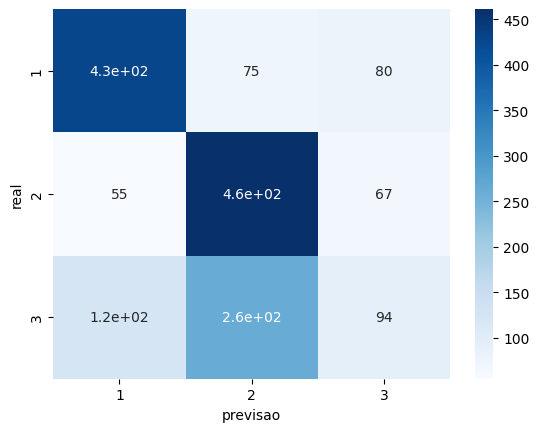

In [116]:
#confusion Matrix

df=pd.DataFrame(df,columns=['real','previsao' ])

cf_matrix=pd.crosstab(df['real'], df['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')